# **1. Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_style('darkgrid')

In [2]:
df_origin = pd.read_csv('./dataset.csv')

In [3]:
df_origin.head()

,text,raw_data_id
0,<|user|> What is high blood pressure? <|eos|> ...,0
1,<|user|> What are the risks of high blood pres...,0
2,<|user|> How is high blood pressure diagnosed?...,0
3,<|user|> What are the lifestyle changes that c...,0
4,<|user|> What are the medicines used to contro...,0


In [4]:
df = df_origin.drop(columns=['raw_data_id'], axis=1)

In [5]:
df.head()

,text
0,<|user|> What is high blood pressure? <|eos|> ...
1,<|user|> What are the risks of high blood pres...
2,<|user|> How is high blood pressure diagnosed?...
3,<|user|> What are the lifestyle changes that c...
4,<|user|> What are the medicines used to contro...


In [6]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<|user|> What is high blood pressure? <|eos|> <|ai|> High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg).
References:
- https://www.nhs.uk/conditions/Blood-pressure-(high)/Pages/Introduction.aspx <|eos|> <|eod|>

**************************************************

<|user|> What are the risks of high blood pressure? <|eos|> <|ai|> Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia.
References:
- https://www.nhs.uk/conditions/Blood-pressure-(high)/Pages/Introduction.aspx <|eos|> <|eod|>

*

In [7]:
df['text'] = df['text'].str.split('References:').str[0].str.strip() + ' <|eos|> <|eod|>'

In [8]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<|user|> What is high blood pressure? <|eos|> <|ai|> High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg). <|eos|> <|eod|>

**************************************************

<|user|> What are the risks of high blood pressure? <|eos|> <|ai|> Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia. <|eos|> <|eod|>

**************************************************

<|user|> How is high blood pressure diagnosed? <|eos|> <|ai|> The only way of knowing whether you have high blood pressure is to 

In [9]:
import re

def convert_to_gemma_format(text):
    t = text.replace('<|eos|>', '').replace('<|eod|>', '')
    t = t.replace('<|user|>', '<start_of_turn>user\n')
    t = t.replace('<|ai|>', '<end_of_turn>\n<start_of_turn>model\n')
    t = t.strip()
    t = re.sub(r'\n\s+', '\n', t)
    t = re.sub(r'\s+<end_of_turn>', '<end_of_turn>', t)
    t = re.sub(r'[ \t]+(\n)', r'\1', t)
    t = re.sub(r' {2,}', ' ', t)
    if not t.endswith('<end_of_turn>'):
        t = t + '<end_of_turn>'

    return t
    
df['text'] = df['text'].apply(convert_to_gemma_format)

In [10]:
for i in range(5):
    print(f'{df.loc[i, "text"]}\n\n' + '*' * 50 + '\n')

<start_of_turn>user
What is high blood pressure?<end_of_turn>
<start_of_turn>model
High blood pressure is a condition where the force at which your heart pumps blood around your body is high. It is recorded with 2 numbers, the systolic pressure and the diastolic pressure, both measured in millimetres of mercury (mmHg).<end_of_turn>

**************************************************

<start_of_turn>user
What are the risks of high blood pressure?<end_of_turn>
<start_of_turn>model
Persistent high blood pressure can put extra strain on your blood vessels, heart, and other organs, such as the brain, kidneys, and eyes. It can increase your risk of serious and potentially life-threatening health conditions, such as heart disease, heart attacks, strokes, heart failure, peripheral arterial disease, aortic aneurysms, kidney disease, and vascular dementia.<end_of_turn>

**************************************************

<start_of_turn>user
How is high blood pressure diagnosed?<end_of_turn>
<sta

In [11]:
df['len'] = df['text'].str.split().apply(len)

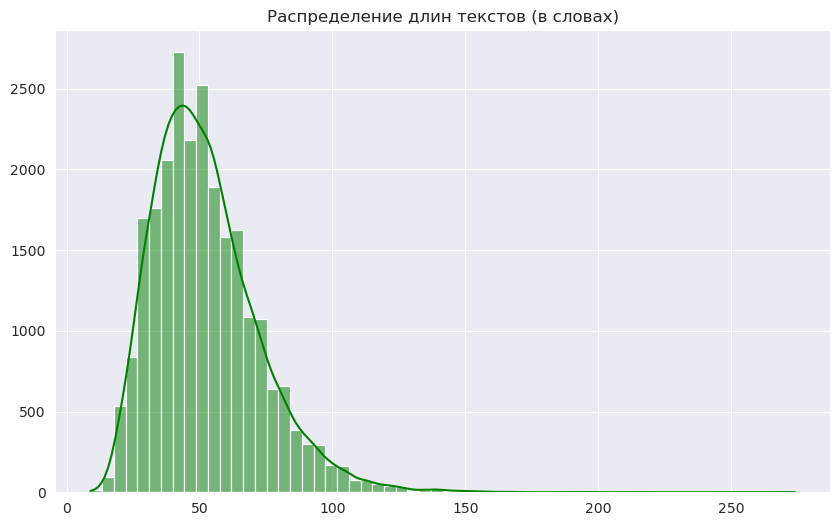

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='len', kde=True, bins=60, color='green')
plt.title('Распределение длин текстов (в словах)')
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None);

In [13]:
df.shape

(24665, 2)

In [14]:
df[df['len'] > 160]

,text,len
1410,<start_of_turn>user\nWhat should I do if I mis...,195
6633,<start_of_turn>user\nWhat are the symptoms of ...,166
7044,<start_of_turn>user\nWhat are the main steps f...,166
9885,<start_of_turn>user\nHow does the cervical sec...,170
12862,"<start_of_turn>user\nWhat are ticks, and how c...",164
14215,<start_of_turn>user\nHow do I treat someone wh...,164
14344,<start_of_turn>user\nWhat financial support is...,162
14768,<start_of_turn>user\nWhat are the stages of me...,217
17722,<start_of_turn>user\nHow can I keep children u...,274
22835,<start_of_turn>user\nHow can I prepare for tra...,186


In [15]:
df = df[df['len'] < 160]

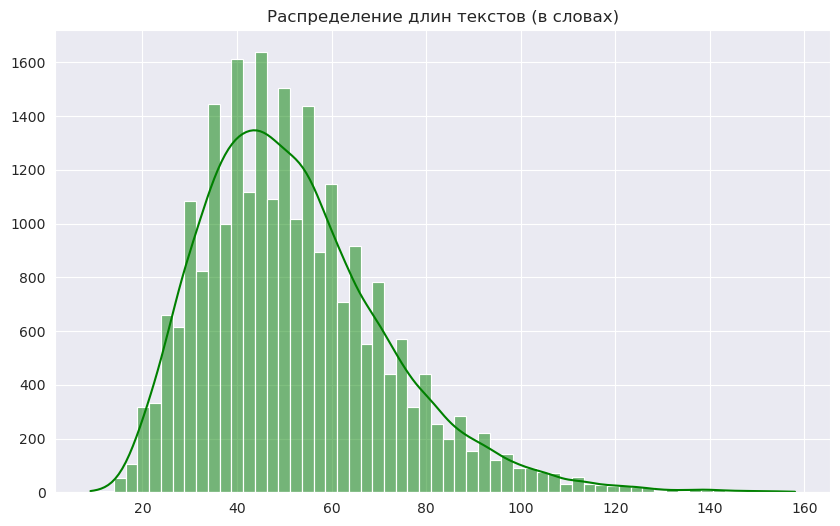

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='len', kde=True, bins=60, color='green')
plt.title('Распределение длин текстов (в словах)')
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None);

In [17]:
df

,text,len
0,<start_of_turn>user\nWhat is high blood pressu...,47
1,<start_of_turn>user\nWhat are the risks of hig...,64
2,<start_of_turn>user\nHow is high blood pressur...,64
3,<start_of_turn>user\nWhat are the lifestyle ch...,56
4,<start_of_turn>user\nWhat are the medicines us...,55
...,...,...
24660,<start_of_turn>user\nWhat is the prevalence of...,32
24661,<start_of_turn>user\nWhat is the prevalence of...,21
24662,<start_of_turn>user\nWhat is the burden associ...,69
24663,<start_of_turn>user\nWhat does the clinical gu...,43


In [18]:
df['text'] = df['text'].str.replace("<\\|eos\\|>", "<eos>", regex=True)

In [19]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[["text"]])

In [20]:
dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 24654
})

In [21]:
dataset = dataset.remove_columns(["__index_level_0__"])

In [22]:
from datasets import DatasetDict

split_temp = dataset.train_test_split(test_size=0.1, seed=42)

temp = split_temp["test"]
val_test_split = temp.train_test_split(test_size=0.5, seed=42)

dataset = DatasetDict({
    "train": split_temp["train"],
    "validation": val_test_split["train"],
    "test": val_test_split["test"]
})

In [23]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 22188
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 1233
    })
    test: Dataset({
        features: ['text'],
        num_rows: 1233
    })
})

# **2. Data Tokenization**

In [24]:
from transformers import AutoTokenizer

checkpoint = "./gemma-2-2b-it"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [25]:
print("padding_side:", tokenizer.padding_side)

padding_side: left


In [26]:
tokenizer.padding_side = 'right'

In [27]:
print(tokenizer.vocab_size)

256000


In [28]:
print(tokenizer.special_tokens_map)
print(tokenizer.all_special_tokens)

{'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}
['<bos>', '<eos>', '<unk>', '<pad>', '<start_of_turn>', '<end_of_turn>']


In [29]:
def tokenize_for_len_analysis(example, max_length=1024):
    tokens = tokenizer(
        example["text"],
        padding=False
    )["input_ids"]

    return {"input_ids": tokens}

In [30]:
tokenized_dataset_temp = dataset.map(tokenize_for_len_analysis, batched=False)

Map:   0%|          | 0/22188 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

In [31]:
lengths = [len(x["input_ids"]) for x in tokenized_dataset_temp["train"]]
lengths_df = pd.DataFrame(data=lengths)

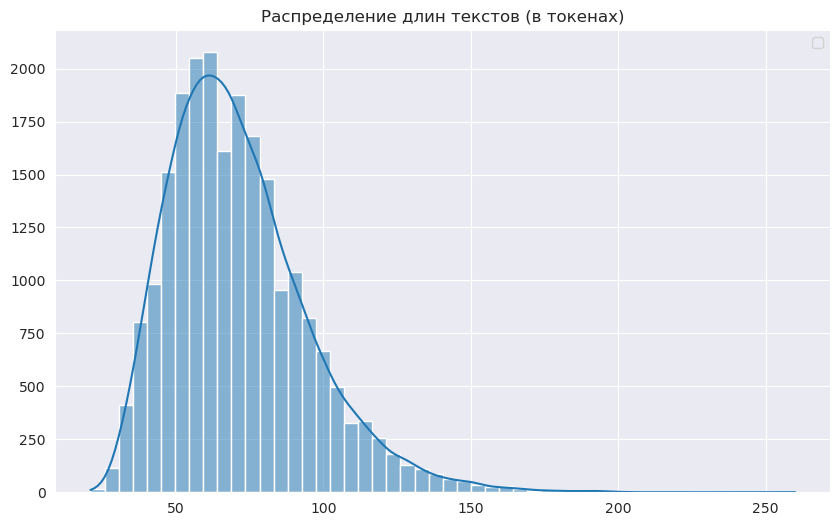

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=lengths_df, kde=True, bins=50)
plt.yticks(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend([])
plt.title("Распределение длин текстов (в токенах)");

In [33]:
print("90-й перцентиль:", np.percentile(lengths, 90))
print("95-й перцентиль:", np.percentile(lengths, 95))
print("99-й перцентиль:", np.percentile(lengths, 99))
print("Максимальная длина:", max(lengths))

90-й перцентиль: 102.0
95-й перцентиль: 115.0
99-й перцентиль: 144.0
Максимальная длина: 260


In [28]:
def tokenize_and_mask(example, max_length=152):
    tokens = tokenizer(
        example["text"],
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )["input_ids"]

    start_id = tokenizer.convert_tokens_to_ids("<start_of_turn>")
    indices = [i for i, t in enumerate(tokens) if t == start_id]

    ai_index = None
    for idx in indices:
        following_text = tokenizer.decode(tokens[idx: idx+3])
        if "model" in following_text:
            ai_index = idx
            break

    if ai_index is None:
        return {"input_ids": tokens, "labels": [-100] * len(tokens)}

    labels = [-100] * (ai_index + 1) + tokens[ai_index + 1:]
    labels = [tok if tok != 0 else -100 for tok in labels]

    return {"input_ids": tokens, "labels": labels} 

In [29]:
tokenizer.padding_side

'right'

In [30]:
tokenized_dataset = dataset.map(tokenize_and_mask, batched=False)

Map:   0%|          | 0/22188 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

# **3. Peft Model Initialization**

In [37]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

bnb = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [38]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(
    checkpoint,
    quantization_config=bnb,
    trust_remote_code=True,
    device_map="auto",
    attn_implementation="eager"
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [39]:
from peft import prepare_model_for_kbit_training
model = prepare_model_for_kbit_training(model)

In [40]:
from peft import LoraConfig, get_peft_model

lora = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    target_modules=['q_proj', 'k_proj', 'v_proj', 'o_proj']
)

model = get_peft_model(model, lora)

In [41]:
model.config.use_cache = False
model.gradient_checkpointing_enable() 

# **4. Model Fitting**

In [42]:
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

training_args = TrainingArguments(
    output_dir="./gemma-lora",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    num_train_epochs=3,
    save_strategy="steps",
    save_steps=200,
    logging_steps=50,
    eval_strategy="steps",
    eval_steps=200,
    fp16=True,

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator
)

In [43]:
trainer.train()

Step,Training Loss,Validation Loss
200,1.407800,1.450947
400,1.399900,1.430228
600,1.376100,1.418321
800,1.372800,1.407141
1000,1.356900,1.398972
1200,1.343000,1.392303
1400,1.327600,1.388579
1600,1.295700,1.387607
1800,1.299400,1.382338
2000,1.262700,1.381489


TrainOutput(global_step=4161, training_loss=1.306211645744707, metrics={'train_runtime': 14895.1274, 'train_samples_per_second': 4.469, 'train_steps_per_second': 0.279, 'total_flos': 1.2309507749250662e+17, 'train_loss': 1.306211645744707, 'epoch': 3.0})

In [44]:
logs = pd.DataFrame(trainer.state.log_history)

train_logs = logs[logs["loss"].notnull()]
eval_logs = logs[logs["eval_loss"].notnull()]

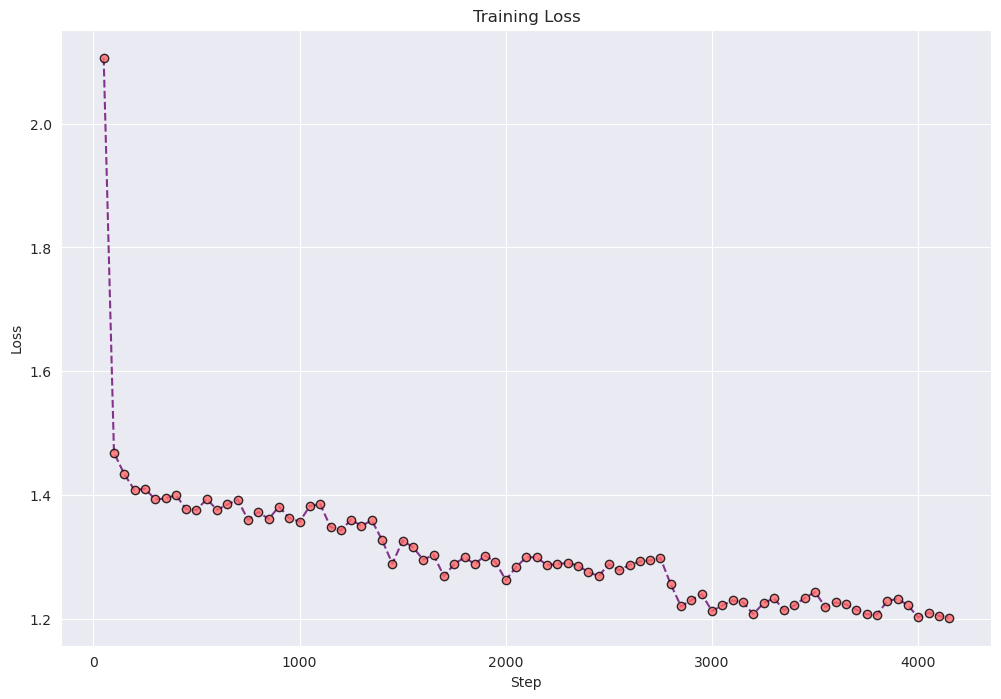

In [45]:
plt.figure(figsize=(12, 8))

plt.plot(
    train_logs["step"], 
    train_logs["loss"], 
    marker="o",
    linestyle="--",
    alpha=0.8,
    color='#6A0572',           
    markerfacecolor='#FF6B6B', 
    markeredgecolor='black'
)

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True);

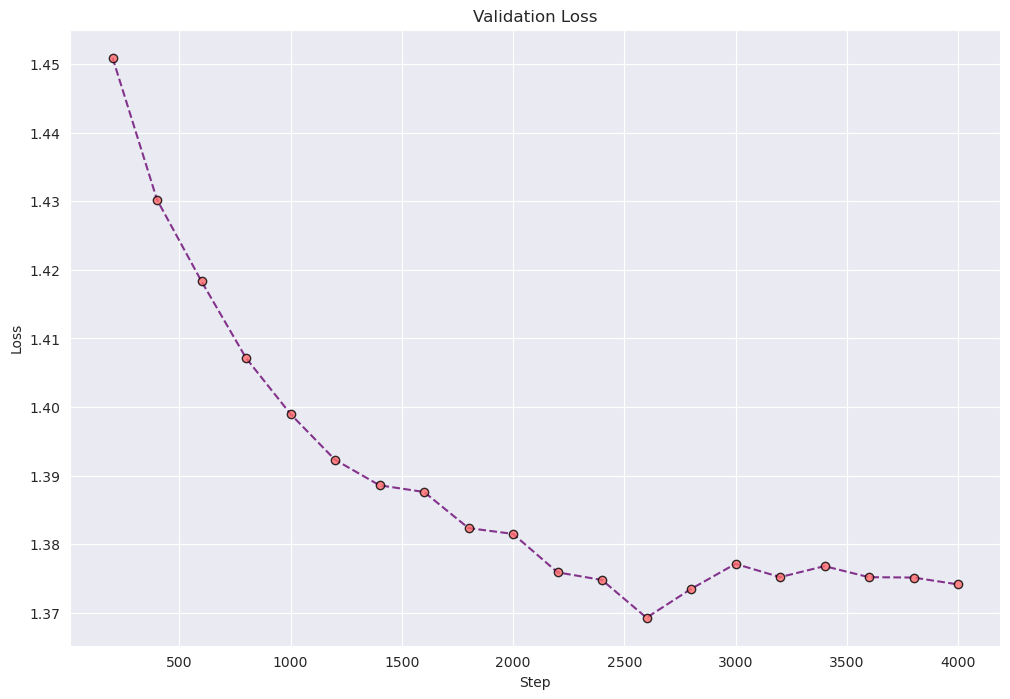

In [46]:
plt.figure(figsize=(12, 8))

plt.plot(
    eval_logs["step"], 
    eval_logs["eval_loss"], 
    marker="o",
    linestyle="--",
    alpha=0.8,
    color='#6A0572',           
    markerfacecolor='#FF6B6B', 
    markeredgecolor='black'
)

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Validation Loss")
plt.grid(True);

# **5. Model to Hub Pushing**

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

base_model_path = "./gemma-2-2b-it"
model_name = "gemma-2-2B-full"

tokenizer = AutoTokenizer.from_pretrained(base_model_path)
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_path,
    device_map="auto",
    torch_dtype=torch.float16
)

base_model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...jt/model-00001-of-00002.safetensors:   2%|1         | 92.3MB / 4.99GB            

  ...jt/model-00002-of-00002.safetensors:  35%|###4      | 83.9MB /  241MB            

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /tmp/tmpv0b831cx/tokenizer.model      : 100%|##########| 4.24MB / 4.24MB            

  /tmp/tmpv0b831cx/tokenizer.json       : 100%|##########| 34.4MB / 34.4MB            

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/aeternnar/gemma-2-2B-full/commit/1728b1fe58de7ac6eb45f210f9ccd47361508f8d', commit_message='Upload tokenizer', commit_description='', oid='1728b1fe58de7ac6eb45f210f9ccd47361508f8d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/aeternnar/gemma-2-2B-full', endpoint='https://huggingface.co', repo_type='model', repo_id='aeternnar/gemma-2-2B-full'), pr_revision=None, pr_num=None)

In [3]:
from peft import PeftModel

lora_path = "./gemma-lora/checkpoint-2600"
model = PeftModel.from_pretrained(base_model, lora_path)

model.push_to_hub("gemma-2-2B-clinical-assistant-peft")
tokenizer.push_to_hub("gemma-2-2B-clinical-assistant-peft")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...p9xk4470_/adapter_model.safetensors: 100%|##########| 12.8MB / 12.8MB            

README.md: 0.00B [00:00, ?B/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  /tmp/tmpvo_o_s93/tokenizer.model      : 100%|##########| 4.24MB / 4.24MB            

  /tmp/tmpvo_o_s93/tokenizer.json       : 100%|##########| 34.4MB / 34.4MB            

CommitInfo(commit_url='https://huggingface.co/aeternnar/gemma-2-2B-clinical-assistant-peft/commit/13588068116481fe17e27ab8eaad046a1930269b', commit_message='Upload tokenizer', commit_description='', oid='13588068116481fe17e27ab8eaad046a1930269b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/aeternnar/gemma-2-2B-clinical-assistant-peft', endpoint='https://huggingface.co', repo_type='model', repo_id='aeternnar/gemma-2-2B-clinical-assistant-peft'), pr_revision=None, pr_num=None)

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel

base_model_name = "aeternnar/gemma-2-2B-full"
lora_model_name = "aeternnar/gemma-2-2B-clinical-assistant-peft"

tokenizer = AutoTokenizer.from_pretrained(base_model_name)
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_name,
    device_map="auto",
    torch_dtype=torch.float16
)

model = PeftModel.from_pretrained(base_model, lora_model_name).to("cuda")

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/591 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

# **6. Model Evaluiation**

In [32]:
test_dataset = tokenized_dataset['test'].remove_columns(["text"])

In [33]:
test_dataset

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 1233
})

In [34]:
from datasets import Dataset

def split_prompt_answer(example):
    labels = example["labels"]
    non_mask_idxs = [i for i, v in enumerate(labels) if v != -100]
    start_idx = non_mask_idxs[0] if non_mask_idxs else len(example["input_ids"])
    example["prompt_ids"] = example["input_ids"][:start_idx]
    example["answer_ids"] = example["input_ids"][start_idx:]
    return example

test_examples = test_dataset.map(split_prompt_answer)

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

In [37]:
from tqdm import tqdm
import evaluate

device = 'cuda' if torch.cuda.is_available() else 'cpu'

rouge_metric = evaluate.load("rouge")
bertscore_metric = evaluate.load("bertscore")
sacrebleu_metric = evaluate.load("sacrebleu")

In [39]:
import gc

all_preds = []
all_labels = []
all_bleu_scores = []

for ex in tqdm(test_examples):
    input_ids = torch.tensor([ex['prompt_ids']], device=device)
    
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=input_ids,
            max_new_tokens=150,
            do_sample=False,
            pad_token_id=tokenizer.pad_token_id
        )
    
    pred_text = tokenizer.decode(generated_ids[0][len(ex['prompt_ids']):], skip_special_tokens=True)
    label_text = tokenizer.decode([id for id in ex['answer_ids'] if id != -100], skip_special_tokens=True)

    all_preds.append(pred_text)
    all_labels.append(label_text)

    del input_ids, generated_ids
    torch.cuda.empty_cache()
    gc.collect()

rouge_res = rouge_metric.compute(predictions=all_preds, references=all_labels)
bertscore_res = bertscore_metric.compute(
    predictions=all_preds, 
    references=all_labels, 
    lang="en",
    batch_size=4
)

sacrebleu_res = sacrebleu_metric.compute(predictions=all_preds, references=all_labels)

print(f"SacreBLEU: {sacrebleu_res['score']:.4f}")
print("---")
print(f"ROUGE-1: {rouge_res['rouge1']:.4f}")
print(f"ROUGE-2: {rouge_res['rouge2']:.4f}")
print(f"ROUGE-L: {rouge_res['rougeL']:.4f}")
print(f"ROUGE-Lsum: {rouge_res['rougeLsum']:.4f}")
print("---")
print(f"BERTScore Precision: {np.mean(bertscore_res['precision']):.4f}")
print(f"BERTScore Recall: {np.mean(bertscore_res['recall']):.4f}")
print(f"BERTScore F1: {np.mean(bertscore_res['f1']):.4f}")

100%|██████████████████████████████████████████████████████████| 1233/1233 [34:04<00:00,  1.66s/it]


SacreBLEU: 13.8211
---
ROUGE-1: 0.4173
ROUGE-2: 0.2115
ROUGE-L: 0.3427
ROUGE-Lsum: 0.3426
---
BERTScore Precision: 0.9192
BERTScore Recall: 0.9020
BERTScore F1: 0.9103
